# Approaching categorical variables
                                                                Athani Analyst

#### What are categorical variables?
Categorical variables/features are any feature type can be classified into two major
types:

• Nominal

• Ordinal

Nominal variables are variables that have two or more categories which do not
have any kind of order associated with them. For example, if gender is classified
into two groups, i.e. male and female, it can be considered as a nominal variable.

Ordinal variables, on the other hand, have “levels” or categories with a particular
order associated with them. For example, an ordinal categorical variable can be a
feature with three different levels: low, medium and high. Order is important.

As far as definitions are concerned, we can also categorize categorical variables as
binary, i.e., a categorical variable with only two categories. 

Some even talk about
a type called “cyclic” for categorical variables. Cyclic variables are present in
“cycles” for example, days in a week: Sunday, Monday, Tuesday, Wednesday,
Thursday, Friday and Saturday. After Saturday, we have Sunday again.
This is a
cycle. Another example would be hours in a day if we consider them to be
categories.

 

In [59]:
import pandas as pd

In [150]:
df=pd.read_csv('cat_dat.csv')

In [151]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


The dataset consists of all kinds of categorical variables:
• Nominal
• Ordinal
• Cyclical
• Binary

In [30]:
for i in df.columns:
    print(pd.unique(df[i]))

[0 1]
[0 1]
[0 1]
['T' 'F']
['Y' 'N']
['Green' 'Blue' 'Red']
['Triangle' 'Trapezoid' 'Polygon' 'Square' 'Star' 'Circle']
['Snake' 'Hamster' 'Lion' 'Cat' 'Dog' 'Axolotl']
['Finland' 'Russia' 'Canada' 'Costa Rica' 'China' 'India']
['Bassoon' 'Piano' 'Theremin' 'Oboe']
['50f116bcf' 'b3b4d25d0' '3263bdce5' 'f12246592' '5b0f5acd5' '46cab09da'
 'be5592604' '72f8028dc' '4604905e7' 'ad95dc0ee' '2ff007c26' 'a35c346aa'
 'dbfb714a4' 'e1558b071' '39647c92a' 'ee55b9d67' '416a8f3ab' '91bde92fa'
 '3aa9329e2' '568550f04' 'caf83c0b5' '908a1b9c9' 'e844a1f66' 'dbc448931'
 '2979f0d45' '96c73114c' 'b7bb45938' '7da3e4aec' 'be4578201' 'dc07effb0'
 '88917a066' 'f2d59cf51' '5d18641ff' '9347491f2' '475e79160' 'e70a6270d'
 '5b1a9f841' 'e0efe9d20' 'd1b1709e8' '9bb7ea2da' '6fec43dd8' '0dee9b39a'
 '527ded12a' '321bf770e' 'f7821e391' '0de4acd31' '185ba0a59' '4845cc770'
 'bdb9fef4a' '3fef1a765' '2cc9e16b9' 'fd04a970f' '81f9d3312' '30a15b6bd'
 '8dcf8adfb' '83b38aa6b' '74bd42d5f' '5a94fc1d9' '4e1b529f6' '8d5d9f3db'
 '4

In [31]:
df.ord_2.unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

Let’s look at ord_2 feature in the dataset. It consists of six different categories:
• Freezing
• Warm
• Cold
• Boiling Hot
• Hot
• Lava Hot

We have to know that computers do not understand text data and thus, we need to
convert these categories to numbers

A simple way of doing this would be to create
a dictionary that maps these values to numbers starting from 0 to N-1, where N is
the total number of categories in a given feature.



In [36]:
mapping={
    'Freezing':0,
    'Warm':1,
    'Cold':2,
    'Boiling Hot':3,
    'Hot':4,
    'Lava Hot':5    
}

In [37]:
mapping

{'Freezing': 0,
 'Warm': 1,
 'Cold': 2,
 'Boiling Hot': 3,
 'Hot': 4,
 'Lava Hot': 5}

#### Value counts before mapping:

In [47]:
df.ord_2.value_counts()

Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
Warm           19654
Name: ord_2, dtype: int64

In [48]:
df.loc[:,'ord_2']=df['ord_2'].map(mapping)

#### Value counts after mapping:

In [44]:
df.ord_2.value_counts()

0    99816
5    63908
3    60627
2    33768
4    22227
1    19654
Name: ord_2, dtype: int64

#### We can do the same by using LabelEncoder from scikit-learn.

In [50]:
import pandas as pd
from sklearn import preprocessing

In [59]:
# read the data
df=pd.read_csv('cat_dat.csv',index_col="id")

# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

#You will see that I use fillna from pandas.
#The reason is LabelEncoder from scikitlearn does not handle NaN values, and ord_2 column has NaN values in it.

We can use this directly in many tree-based models:
• Decision trees
• Random forest
• Extra Trees
• Or any kind of boosted trees model
    o XGBoost
    o GBM
    o LightGBM
    
    
This type of encoding cannot be used in linear models, support vector machines or
neural networks as they expect data to be normalized (or standardized).

For these types of models, we can binarize the data.

Freezing    --> 0 --> 0 0 0
Warm        --> 1 --> 0 0 1
Cold        --> 2 --> 0 1 0
Boiling Hot --> 3 --> 0 1 1
Hot         --> 4 --> 1 0 0
Lava Hot    --> 5 --> 1 0 1

This is just converting the categories to numbers and then converting them to their
binary representation. We are thus splitting one feature into three (in this case)
features (or columns). If we have more categories, we might end up splitting into a
lot more columns.

It becomes easy to store lots of binarized variables like this if we store them in a
sparse format. A sparse format is nothing but a representation or way of storing
data in memory in which you do not store all the values but only the values that
matter. In the case of binary variables described above, all that matters is where we
have ones (1s). 

In [24]:
!pip install pillow
from PIL import Image, ImageDraw

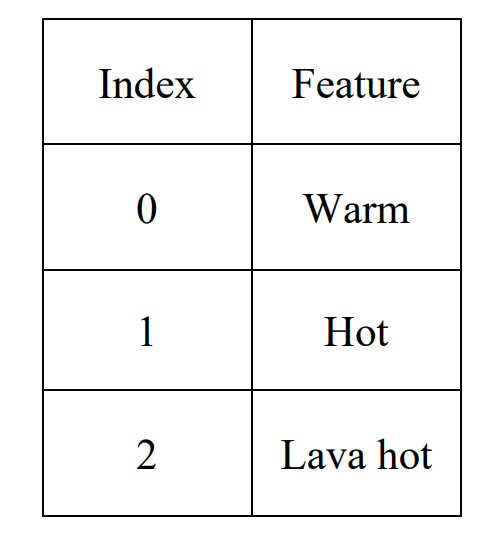

In [25]:
try: 
    img  = Image.open("example_labale_enocding.png") 
except IOError:
    pass

img

Let’s assume that we are provided with only one feature in the dataframe above:
ord_2.

Currently, we are looking at only three samples in the dataset. Let’s convert this to
binary representation where we have three items for each sample.
These three items are the three features.


So, our features are stored in a matrix which has 3 rows and 3 columns - 3x3. Each
element of this matrix occupies 8 bytes. So, our total memory requirement for this
array is 8x3x3 = 72 bytes.

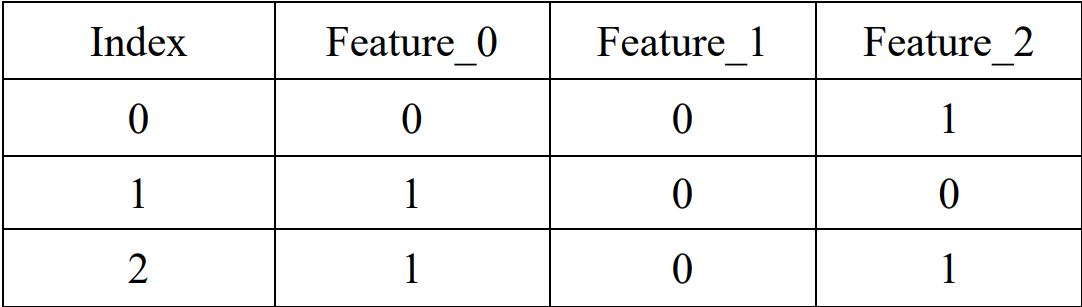

In [28]:
try: 
    img  = Image.open("binary.png") 
except IOError:
    pass
img

So, our features are stored in a matrix which has 3 rows and 3 columns - 3x3. Each element of this matrix occupies 8 bytes. 
So, our total memory requirement for this array is 8x3x3 = 72 bytes

##### We can also check this using a simple python snippet.

In [35]:
example = np.array(
 [
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 1]
 ]
)
# print size in bytes
print(example.nbytes)

36


do we need to store all the
elements of this matrix? No. As mentioned before we are only interested in 1s. 0s
are not that important because anything multiplied with 0 will be zero and 0
added/subtracted to/from anything doesn’t make any difference. One way to
represent this matrix only with ones would be some kind of dictionary method in
which keys are indices of rows and columns and value is 1

In [37]:
import numpy as np
from scipy import sparse
# create our example feature matrix
example = np.array(
 [
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 1]
 ]
)
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(sparse_example.data.nbytes)
 

16


This will print 16, which is so less than our dense array! The total size of the sparse
csr matrix is the sum of three values.


In [38]:
print(
 sparse_example.data.nbytes +
 sparse_example.indptr.nbytes +
 sparse_example.indices.nbytes
)

48


This will print 48, which is still less than our dense array. Unfortunately, I will not
go into the details of these elements. You can read more about them in scipy docs.
The difference in size becomes vast when we have much larger arrays, let’s say
with thousands of samples and tens of thousands of features. For example, a text
dataset where we are using count-based features.
 

In [47]:
# number of rows
n_rows = 10000
# number of columns
n_cols = 100000
# create random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))
# print size in bytes
print(f"Size of dense array: {example.nbytes}")
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
 sparse_example.data.nbytes +
 sparse_example.indptr.nbytes +
 sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")


Size of dense array: 4000000000
Size of sparse array: 200031108
Full size of sparse array: 400102220


that’s why we prefer sparse arrays over dense whenever we have a lot of zeros
in our features. 

Even though the sparse representation of binarized features takes much less
memory than its dense representation, there is another transformation for
categorical variables that takes even less memory.This is known as One Hot
Encoding.

## One Hot Encoding.

One hot encoding is a binary encoding too in the sense that there are only two
values, 0s and 1s. 

However, it must be noted that it’s not a binary representation.
Its representation can be understood by looking at the following example.

Suppose we represent each category of the ord_2 variable by a vector. This vector
is of the same size as the number of categories in the ord_2 variable. In this specific
case, each vector is of size six and has all zeros except at one position. Let’s look
at this particular table of vectors.

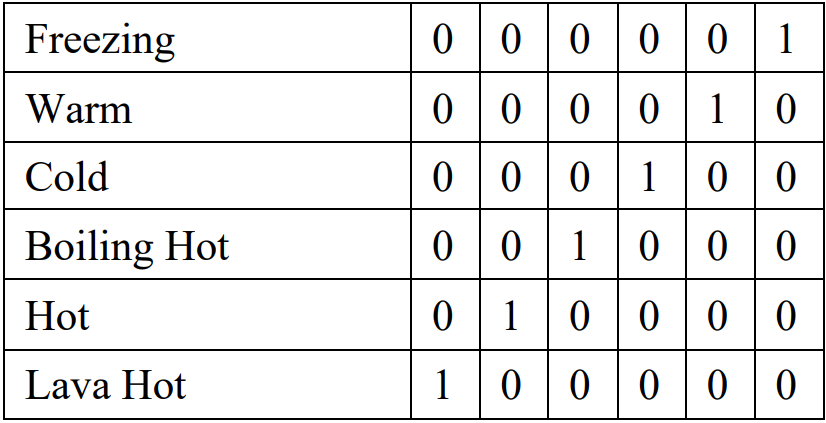

In [49]:
try: 
    img  = Image.open("one_hot_encoding.png") 
except IOError:
    pass
img

We see that the size of vectors is 1x6, i.e. there are six elements in the vector. Where
does this number come from? If you look carefully, you will see that there are six
categories, as mentioned before. When one-hot encoding, the vector size has to be
same as the number of categories we are looking at. Each vector has a 1 and rest all
other values are 0s. Now, let’s use these features instead of the binarized feature as
before and see how much memory can we save.

In [50]:
import numpy as np
from scipy import sparse
# create binary matrix
example = np.array(
 [
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0]
 ]
)
# print size in bytes
print(f"Size of dense array: {example.nbytes}")

Size of dense array: 72


In [52]:
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
 sparse_example.data.nbytes +
 sparse_example.indptr.nbytes +
 sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of sparse array: 12
Full size of sparse array: 40


We see that the dense array size is much larger than the one with binarization.
However, the size of the sparse array is much less. Let’s try this with a much larger
array. In this example, we will use OneHotEncoder from scikit-learn to transform
our feature array with 1001 categories into dense and sparse matrices.

In [57]:
import numpy as np
from sklearn import preprocessing
# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)
# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)
# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)
# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
 ohe_example.data.nbytes +
 ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


Dense array size here is approximately 8GB and sparse array is 8MB. If you had a
choice, which one would you choose? Seems like a quite simple choice to me, isn’t it?
These three methods are the most important ways to handle categorical variables.

There are, however, many other different methods you can use to handle categorical
variables. An example of one such method is about converting categorical variables
to numerical variables.

In [76]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

##### Suppose we go back to the categorical features dataframe (original cat-in-the-datii) that we had. How many ids do we have in the dataframe where the value of ord_2 is Boiling Hot ? 

In [67]:
df[df['ord_2']=='Boiling Hot'].shape

(60627, 24)

In [78]:
 df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot    60627
Cold           33768
Freezing       99816
Hot            22227
Lava Hot       63908
Warm           19654
Name: id, dtype: int64

We see that there are 60627 rows with this value. We can also calculate this value
for all the categories using groupby in pandas.

In [82]:
df.groupby(["ord_2"])["id"].transform("count")

0         33768
1         22227
2         63908
3         60627
4         99816
          ...  
299995    99816
299996    99816
299997    60627
299998    60627
299999    99816
Name: id, Length: 300000, dtype: int64

If we just replace ord_2 column with its count values, we have converted it to a
feature which is kind of numerical now. We can create a new column or replace this
column by using the transform function of pandas along with groupby.

In [86]:
df.groupby(['ord_1','ord_2'])['id'].count()

ord_1        ord_2      
Contributor  Boiling Hot     8692
             Cold            4842
             Freezing       14284
             Hot             3122
             Lava Hot        9074
             Warm            2857
Expert       Boiling Hot     4980
             Cold            2850
             Freezing        8432
             Hot             1887
             Lava Hot        5274
             Warm            1642
Grandmaster  Boiling Hot    15719
             Cold            8702
             Freezing       25620
             Hot             5697
             Lava Hot       16617
             Warm            5073
Master       Boiling Hot     5720
             Cold            3129
             Freezing        9401
             Hot             2069
             Lava Hot        5882
             Warm            1852
Novice       Boiling Hot    25516
             Cold           14245
             Freezing       42079
             Hot             9452
             Lava Hot  

In [89]:
df.groupby(['ord_1','ord_2'])['id'].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,8692
1,Contributor,Cold,4842
2,Contributor,Freezing,14284
3,Contributor,Hot,3122
4,Contributor,Lava Hot,9074
5,Contributor,Warm,2857
6,Expert,Boiling Hot,4980
7,Expert,Cold,2850
8,Expert,Freezing,8432
9,Expert,Hot,1887


You can add counts of all the features or can also replace them or maybe group by
multiple columns and their counts. For example, the following code counts by
grouping on ord_1 and ord_2 columns.

##### One more trick is to create new features from these categorical variables. You can create new categorical features from existing features, and this can be done in an effortless manner.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [104]:
df["new_feature"]=df.ord_1.astype(str)+"_"+df.ord_2.astype(str)+"_"+df.ord_3.astype(str)


In [105]:
df.new_feature

0                Grandmaster_Cold_h
1                 Grandmaster_Hot_a
2                 Expert_Lava Hot_h
3         Grandmaster_Boiling Hot_i
4            Grandmaster_Freezing_a
                    ...            
299995       Contributor_Freezing_k
299996            Novice_Freezing_h
299997         Novice_Boiling Hot_o
299998         Master_Boiling Hot_h
299999       Contributor_Freezing_i
Name: new_feature, Length: 300000, dtype: object

Here, we have combined ord_1 and ord_2 by an underscore, and before that, we
convert these columns to string types. Note that NaN will also convert to string. But
it’s okay. We can also treat NaN as a new category. Thus, we have a new feature
which is a combination of these two features. You can also combine more than three
columns or four or even more.


So which categories should we combine? Well, there isn't an easy answer to that. It
depends on your data and the types of features. Some domain knowledge might be
useful for creating features like this. But if you don’t have concerns about memory
and CPU usage, you can go for a greedy approach where you can create many such
combinations and then use a model to decide which features are useful and keep
them. We will read about it later in this book.

## Whenever you get categorical variables, follow these simple steps:

• fill the NaN values (this is very important!)

• convert them to integers by applying label encoding using LabelEncoder
 of scikit-learn or by using a mapping dictionary. If you didn’t fill up NaN
 values with something, you might have to take care of them in this step

• create one-hot encoding. Yes, you can skip binarization!

• go for modelling! I mean the machine learning one. Not on the ramp.



Handling NaN data in categorical features is quite essential else you can get the
infamous error from scikit-learn’s LabelEncoder:

ValueError: y contains previously unseen labels: [nan, nan, nan, nan,
nan, nan, nan, nan]

This simply means that when you are transforming the test data, you have NaN
values in it. It’s because you forgot to handle them during training.

One simple way
to handle NaN values would be to drop them. Well, it’s simple but not ideal. NaN
values may have a lot of information in them, and you will lose it if you just drop
these values

There might also be many situations where most of your data has NaN
values, and thus, you cannot drop rows/samples with NaN values.

Another way of
handling NaN values is to treat them as a completely new category. This is the most
preferred way of handling NaN values. And can be achieved in a very simple
manner if you are using pandas.

In [153]:
df.ord_4.fillna("NONE")

0         D
1         A
2         R
3         D
4         R
         ..
299995    K
299996    W
299997    A
299998    W
299999    R
Name: ord_4, Length: 300000, dtype: object

In [174]:
df.loc[df["ord_4"].value_counts()[df["ord_4"]].values<2000,"ord_4"]="RARE"

In [175]:
df.ord_4.value_counts()

L       19066
G       18899
S       18875
A       18258
R       16927
Q       15925
K       14698
I       14644
Z       14232
T       14220
V       14143
J       12878
P       12839
U       12775
H       12743
F       11717
E       11303
W        9197
Y        8490
X        6292
B        6169
O        5836
D        3974
C        3575
N        2166
RARE      159
Name: ord_4, dtype: int64